In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test=x_test.reshape(-1,28,28,1).astype('float32')/255.0

y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [ ]:
print(x_test.shape,y_test.shape)

(10000, 28, 28, 1) (10000, 10)


In [ ]:
print(x_train.shape,y_train.shape)

(60000, 28, 28, 1) (60000, 10)


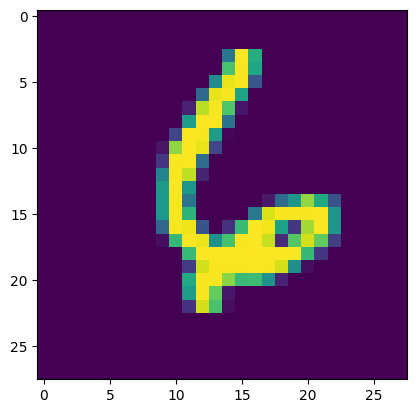

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt
index=59000
plt.imshow(x_train[index])
plt.show()
print(y_train[index])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

def build_ann_model():
  model=Sequential()
  model.add(Flatten(input_shape=(28,28,1)))
  model.add(Dense(128,activation="relu"))
  model.add(Dense(64,activation="relu"))
  model.add(Dense(10,activation="softmax"))
  return model


In [ ]:
ann_model=build_ann_model()
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=('accuracy'))
ann_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2399 - accuracy: 0.9312 - val_loss: 0.1189 - val_accuracy: 0.9634
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1027 - accuracy: 0.9695 - val_loss: 0.0983 - val_accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0746 - accuracy: 0.9762 - val_loss: 0.0843 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0764 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.0729 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0355 - accuracy: 0.9882 - val_loss: 0.0813 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0290 - accuracy: 0.9902 - val_loss: 0.0788 - val_accur

In [ ]:
ann_loss,ann_acc=ann_model.evaluate(x_test,y_test)
ann_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9793


0.9793000221252441

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D

def build_cnn_model():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation="relu"))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(64,activation="relu"))
  model.add(Dense(10,activation="softmax"))
  return model


In [ ]:
cnn_model=build_cnn_model()
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=('accuracy'))
cnn_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1332 - accuracy: 0.9588 - val_loss: 0.0411 - val_accuracy: 0.9869
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.0478 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0395 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0286 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0358 - val_accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.0415 - val_accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.0313 -

In [ ]:
cnn_loss,cnn_acc=cnn_model.evaluate(x_test,y_test)
cnn_acc

313/313 [==============================] - 7s 21ms/step - loss: 0.0316 - accuracy: 0.9930


0.9929999709129333